In [1]:
import pandas as pd
import numpy as np

# For Evalution we will use these library

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

pd.set_option('display.max_columns', None)

In [2]:
sentiment_analysis = pd.read_csv("USDT_sentiment_analysis.csv")
persuasion_analysis = pd.read_csv("USDT_persuasion_gpt.csv").drop("Unnamed: 0", axis = 1)

In [3]:
sentiment_analysis.head()

,Title,Date,Open,High,Low,Close,Adj Close,Volume,class,score,polarity,subjectivity
0,Tether Brings Dirham-Pegged Stablecoin to TON ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.986927,0.00,0.00
1,Tether to Launch Dirham-Pegged Stablecoin on t...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.965189,0.00,0.00
2,Tether Introduces Dirham-Pegged Stablecoin on ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.999943,0.00,0.00
3,Tether increases Bitcoin and gold reserves in ...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",positive,0.999220,0.50,0.90
4,Tether hits $7.7 billion in profit YTD as rese...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",positive,0.999973,0.16,0.54


In [4]:
persuasion_analysis.head()

,Title,Date,Open,High,Low,Close,Adj Close,Volume,persuasion_score
0,Tether Brings Dirham-Pegged Stablecoin to TON ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",0.0
1,Tether to Launch Dirham-Pegged Stablecoin on t...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",0.0
2,Tether Introduces Dirham-Pegged Stablecoin on ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",0.0
3,Tether increases Bitcoin and gold reserves in ...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",0.3
4,Tether hits $7.7 billion in profit YTD as rese...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",0.3


In [5]:
df = sentiment_analysis.merge(persuasion_analysis, on = ['Title', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], how = 'inner')
df

,Title,Date,Open,High,Low,Close,Adj Close,Volume,class,score,polarity,subjectivity,persuasion_score
0,Tether Brings Dirham-Pegged Stablecoin to TON ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.986927,0.00,0.00,0.0
1,Tether to Launch Dirham-Pegged Stablecoin on t...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.965189,0.00,0.00,0.0
2,Tether Introduces Dirham-Pegged Stablecoin on ...,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",neutral,0.999943,0.00,0.00,0.0
3,Tether increases Bitcoin and gold reserves in ...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",positive,0.999220,0.50,0.90,0.3
4,Tether hits $7.7 billion in profit YTD as rese...,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",positive,0.999973,0.16,0.54,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,CME Group CEO Terry Duffy: 'Bitcoin Futures Wi...,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,"767,884,032",neutral,1.000000,0.00,0.00,0.7
4516,NaN,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,"1,466,060,032",neutral,0.967353,0.00,0.00,0.0
4517,NaN,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,"746,227,968",neutral,0.967353,0.00,0.00,0.0
4518,NaN,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,"756,446,016",neutral,0.967353,0.00,0.00,0.0


In [6]:
data = df.groupby(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']).agg({'score':'mean', 'persuasion_score': 'mean', 'polarity':'mean','subjectivity':'mean', 'class':lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan}).reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,"358,188,000",0.967353,0.00,0.000000,0.000000,neutral
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,"756,446,016",0.967353,0.00,0.000000,0.000000,neutral
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,"746,227,968",0.967353,0.00,0.000000,0.000000,neutral
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,"1,466,060,032",0.967353,0.00,0.000000,0.000000,neutral
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,"767,884,032",1.000000,0.70,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,"66,855,500,410",0.895219,0.50,0.066667,0.271429,neutral
2546,2024-10-29,0.999333,1.000320,0.998754,0.999729,0.999729,"87,586,242,107",0.913011,0.52,0.010000,0.401667,neutral
2547,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,"69,142,436,437",0.748294,0.60,0.000000,0.000000,negative
2548,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",0.989514,0.25,0.185000,0.521250,positive


In [7]:
data['Price_Direction'] = (data['Close'].shift(-1) > data['Close']).astype(int)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,Price_Direction
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,"358,188,000",0.967353,0.00,0.000000,0.000000,neutral,0
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,"756,446,016",0.967353,0.00,0.000000,0.000000,neutral,1
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,"746,227,968",0.967353,0.00,0.000000,0.000000,neutral,1
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,"1,466,060,032",0.967353,0.00,0.000000,0.000000,neutral,0
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,"767,884,032",1.000000,0.70,0.000000,0.000000,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,"66,855,500,410",0.895219,0.50,0.066667,0.271429,neutral,1
2546,2024-10-29,0.999333,1.000320,0.998754,0.999729,0.999729,"87,586,242,107",0.913011,0.52,0.010000,0.401667,neutral,0
2547,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,"69,142,436,437",0.748294,0.60,0.000000,0.000000,negative,0
2548,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",0.989514,0.25,0.185000,0.521250,positive,1


In [9]:
data['class'].value_counts()

neutral     2222
negative     217
positive     111
Name: class, dtype: int64

In [10]:
data[data['Date'] == '2024-03-26']

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,Price_Direction
2329,2024-03-26,1.000161,1.000826,0.999043,1.000019,1.000019,"77,399,464,621",0.999076,0.28,0.1,0.12,neutral,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2550 non-null   object 
 1   Open              2550 non-null   float64
 2   High              2550 non-null   float64
 3   Low               2550 non-null   float64
 4   Close             2550 non-null   float64
 5   Adj Close         2550 non-null   float64
 6   Volume            2550 non-null   object 
 7   score             2550 non-null   float64
 8   persuasion_score  2550 non-null   float64
 9   polarity          2550 non-null   float64
 10  subjectivity      2550 non-null   float64
 11  class             2550 non-null   object 
 12  Price_Direction   2550 non-null   int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 259.1+ KB


In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2550 non-null   datetime64[ns]
 1   Open              2550 non-null   float64       
 2   High              2550 non-null   float64       
 3   Low               2550 non-null   float64       
 4   Close             2550 non-null   float64       
 5   Adj Close         2550 non-null   float64       
 6   Volume            2550 non-null   object        
 7   score             2550 non-null   float64       
 8   persuasion_score  2550 non-null   float64       
 9   polarity          2550 non-null   float64       
 10  subjectivity      2550 non-null   float64       
 11  class             2550 non-null   object        
 12  Price_Direction   2550 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 259.1+ KB


In [14]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2550 non-null   datetime64[ns]
 1   Open              2550 non-null   float64       
 2   High              2550 non-null   float64       
 3   Low               2550 non-null   float64       
 4   Close             2550 non-null   float64       
 5   Adj Close         2550 non-null   float64       
 6   Volume            2550 non-null   float64       
 7   score             2550 non-null   float64       
 8   persuasion_score  2550 non-null   float64       
 9   polarity          2550 non-null   float64       
 10  subjectivity      2550 non-null   float64       
 11  class             2550 non-null   object        
 12  Price_Direction   2550 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 259.1+ KB

In [16]:
# scaler = MinMaxScaler()
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [17]:
if 'class' in data.columns:
    encoder = LabelEncoder()
    data['class_encoded'] = encoder.fit_transform(data['class'])

In [18]:
features = ['score', 'polarity', 'subjectivity', 'persuasion_score']

# Create lag features (e.g., t-1, t-2 for time-series modeling)
for feature in features:
    for lag in range(1, 6):  # Lags of 1 to 5 days
        data[f'{feature}_t-{lag}'] = data[feature].shift(lag)

# Create rolling averages for price and sentiment features
for feature in features:
    data[f'{feature}_rolling_mean_3'] = data[feature].rolling(window=3).mean()
    data[f'{feature}_rolling_mean_5'] = data[feature].rolling(window=5).mean()

# Drop rows with NaN values caused by shifting and rolling
# data = df.dropna()

In [19]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'score',
       'persuasion_score', 'polarity', 'subjectivity', 'class',
       'Price_Direction', 'class_encoded', 'score_t-1', 'score_t-2',
       'score_t-3', 'score_t-4', 'score_t-5', 'polarity_t-1', 'polarity_t-2',
       'polarity_t-3', 'polarity_t-4', 'polarity_t-5', 'subjectivity_t-1',
       'subjectivity_t-2', 'subjectivity_t-3', 'subjectivity_t-4',
       'subjectivity_t-5', 'persuasion_score_t-1', 'persuasion_score_t-2',
       'persuasion_score_t-3', 'persuasion_score_t-4', 'persuasion_score_t-5',
       'score_rolling_mean_3', 'score_rolling_mean_5',
       'polarity_rolling_mean_3', 'polarity_rolling_mean_5',
       'subjectivity_rolling_mean_3', 'subjectivity_rolling_mean_5',
       'persuasion_score_rolling_mean_3', 'persuasion_score_rolling_mean_5'],
      dtype='object')

In [20]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,Price_Direction,class_encoded,score_t-1,score_t-2,score_t-3,score_t-4,score_t-5,polarity_t-1,polarity_t-2,polarity_t-3,polarity_t-4,polarity_t-5,subjectivity_t-1,subjectivity_t-2,subjectivity_t-3,subjectivity_t-4,subjectivity_t-5,persuasion_score_t-1,persuasion_score_t-2,persuasion_score_t-3,persuasion_score_t-4,persuasion_score_t-5,score_rolling_mean_3,score_rolling_mean_5,polarity_rolling_mean_3,polarity_rolling_mean_5,subjectivity_rolling_mean_3,subjectivity_rolling_mean_5,persuasion_score_rolling_mean_3,persuasion_score_rolling_mean_5
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,3.581880e+08,0.967353,0.00,0.000000,0.000000,neutral,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,7.564460e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,7.462280e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,0.967353,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.967353,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1.466060e+09,0.967353,0.00,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.00,0.00,0.000000,NaN,NaN,0.967353,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,7.678840e+08,1.000000,0.70,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,0.967353,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.00,0.00,0.000000,0.000000,NaN,0.978235,0.973883,0.000000,0.000000,0.000000,0.000000,0.233333,0.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,6.685550e+10,0.895219,0.50,0.066667,0.271429,neutral,1,1,0.820123,0.906884,0.934208,0.971383,0.995460,-0.031111,-0.070412,-0.023934,0.000000,0.000000,0.057778,0.263594,0.206846,0.000000,0.000000,0.40,0.60,0.605556,0.500000,0.700000,0.874076,0.905564,-0.011619,-0.011758,0.197600,0.159929,0.500000,0.521111
2546,2024-10-29,0.999333,1.000320,0.998754,0.999729,0.999729,8.758624e+10,0.913011,0.52,0.010000,0.401667,neutral,0,1,0.895219,0.820123,0.906884,0.934208,0.971383,0.066667,-0.031111,-0.070412,-0.023934,0.000000,0.271429,0.057778,0.263594,0.206846,0.000000,0.50,0.40,0.600000,0.605556,0.500000,0.876118,0.893889,0.015185,-0.009758,0.243624,0.240263,0.473333,0.525111
2547,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,6.914244e+10,0.748294,0.60,0.000000,0.000000,negative,0,0,0.913011,0.895219,0.820123,0.906884,0.934208,0.010000,0.066667,-0.031111,-0.070412,-0.023934,0.401667,0.271429,0.057778,0.263594,0.206846,0.52,0.50,0.400000,0.600000,0.605556,0.852175,0.856706,0.025556,-0.004971,0.224365,0.198893,0.540000,0.524000
2548,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,6.744598e+10,0.989514,0.25,0.185000,0.521250,positive,1,2,0.748294,0.913011,0.895219,0.820123,0.906884,0.000000,0.010000,0.066667,-0.031111,-0.070412,0.000000,0.401667,0.271429,0.057778,0.263594,0.60,0.52,0.500000,0.400000,0.600000,0.883606,0.873232,0.065000,0.046111,0.307639,0.250425,0.456667,0.454000


In [21]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Volatility_5'] = data['Daily_Return'].rolling(window=5).std()

In [22]:
data.isnull().sum()

Date                               0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
score                              0
persuasion_score                   0
polarity                           0
subjectivity                       0
class                              0
Price_Direction                    0
class_encoded                      0
score_t-1                          1
score_t-2                          2
score_t-3                          3
score_t-4                          4
score_t-5                          5
polarity_t-1                       1
polarity_t-2                       2
polarity_t-3                       3
polarity_t-4                       4
polarity_t-5                       5
subjectivity_t-1                   1
subjectivity_t-2                   2
subjectivity_t-3                   3
s

In [23]:
data = data.fillna(0.000000)

In [24]:
data.isnull().sum()

Date                               0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
score                              0
persuasion_score                   0
polarity                           0
subjectivity                       0
class                              0
Price_Direction                    0
class_encoded                      0
score_t-1                          0
score_t-2                          0
score_t-3                          0
score_t-4                          0
score_t-5                          0
polarity_t-1                       0
polarity_t-2                       0
polarity_t-3                       0
polarity_t-4                       0
polarity_t-5                       0
subjectivity_t-1                   0
subjectivity_t-2                   0
subjectivity_t-3                   0
s

In [25]:
# data = data[:-1].drop(['Close', 'Adj Close'], axis=1)
data

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,Price_Direction,class_encoded,score_t-1,score_t-2,score_t-3,score_t-4,score_t-5,polarity_t-1,polarity_t-2,polarity_t-3,polarity_t-4,polarity_t-5,subjectivity_t-1,subjectivity_t-2,subjectivity_t-3,subjectivity_t-4,subjectivity_t-5,persuasion_score_t-1,persuasion_score_t-2,persuasion_score_t-3,persuasion_score_t-4,persuasion_score_t-5,score_rolling_mean_3,score_rolling_mean_5,polarity_rolling_mean_3,polarity_rolling_mean_5,subjectivity_rolling_mean_3,subjectivity_rolling_mean_5,persuasion_score_rolling_mean_3,persuasion_score_rolling_mean_5,Daily_Return,Volatility_5
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,3.581880e+08,0.967353,0.00,0.000000,0.000000,neutral,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,7.564460e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002152,0.000000
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,7.462280e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002962,0.000000
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1.466060e+09,0.967353,0.00,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000000
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,7.678840e+08,1.000000,0.70,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.978235,0.973883,0.000000,0.000000,0.000000,0.000000,0.233333,0.140000,-0.003082,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,6.685550e+10,0.895219,0.50,0.066667,0.271429,neutral,1,1,0.820123,0.906884,0.934208,0.971383,0.995460,-0.031111,-0.070412,-0.023934,0.000000,0.000000,0.057778,0.263594,0.206846,0.000000,0.000000,0.40,0.60,0.605556,0.500000,0.700000,0.874076,0.905564,-0.011619,-0.011758,0.197600,0.159929,0.500000,0.521111,0.000561,0.000796
2546,2024-10-29,0.999333,1.000320,0.998754,0.999729,0.999729,8.758624e+10,0.913011,0.52,0.010000,0.401667,neutral,0,1,0.895219,0.820123,0.906884,0.934208,0.971383,0.066667,-0.031111,-0.070412,-0.023934,0.000000,0.271429,0.057778,0.263594,0.206846,0.000000,0.50,0.40,0.600000,0.605556,0.500000,0.876118,0.893889,0.015185,-0.009758,0.243624,0.240263,0.473333,0.525111,0.000424,0.000807
2547,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,6.914244e+10,0.748294,0.60,0.000000,0.000000,negative,0,0,0.913011,0.895219,0.820123,0.906884,0.934208,0.010000,0.066667,-0.031111,-0.070412,-0.023934,0.401667,0.271429,0.057778,0.263594,0.206846,0.52,0.50,0.400000,0.600000,0.605556,0.852175,0.856706,0.025556,-0.004971,0.224365,0.198893,0.540000,0.524000,-0.000097,0.000310
2548,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,6.744598e+10,0.989514,0.25,0.185000,0.521250,positiv

In [26]:
X = data.drop(['Date', 'Price_Direction', 'class'], axis = 1)
y = data['Price_Direction']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# X_test[np.isinf(X_test['Daily_Return']) == True]
# Replace inf values with 0
# X_test['Daily_Return'].replace([np.inf, -np.inf], 0, inplace=True)


In [29]:
y_train

1601    0
1200    0
1340    1
2492    0
2233    1
       ..
1638    0
1095    0
1130    0
1294    0
860     1
Name: Price_Direction, Length: 2040, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression

# Train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print Performance Metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.5725
AUC-ROC: 0.6150
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       268
           1       0.54      0.61      0.58       242

    accuracy                           0.57       510
   macro avg       0.57      0.57      0.57       510
weighted avg       0.58      0.57      0.57       510



In [31]:
from sklearn.svm import SVC

# Initialize the SVM with probability enabled
svm = SVC(probability=True)  # Enable probability estimates
svm.fit(X_train, y_train)

# Predictions and probabilities
y_pred_svm = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 0]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print Performance Metrics
print("SVM Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.5706
AUC-ROC: 0.4061
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       268
           1       0.55      0.55      0.55       242

    accuracy                           0.57       510
   macro avg       0.57      0.57      0.57       510
weighted avg       0.57      0.57      0.57       510



Random Forest Performance:
Accuracy: 0.6353
AUC-ROC: 0.6490

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       268
           1       0.62      0.60      0.61       242

    accuracy                           0.64       510
   macro avg       0.63      0.63      0.63       510
weighted avg       0.63      0.64      0.63       510


Confusion Matrix:
[[180  88]
 [ 98 144]]


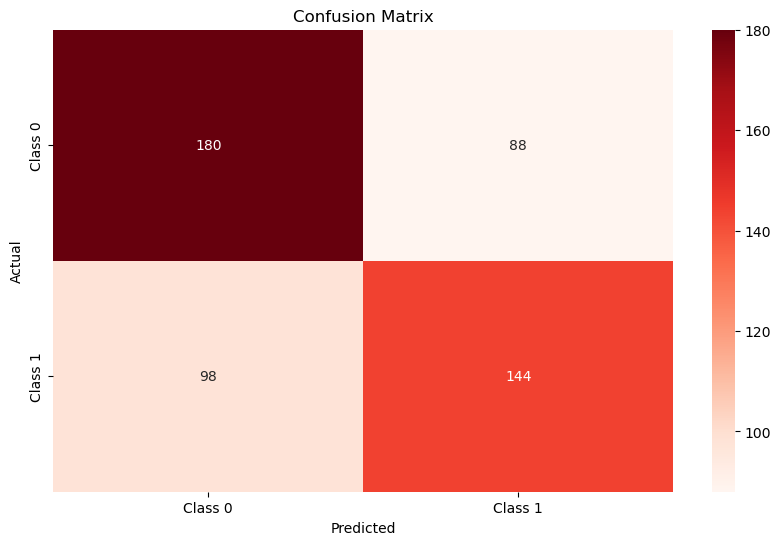

In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print Performance Metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



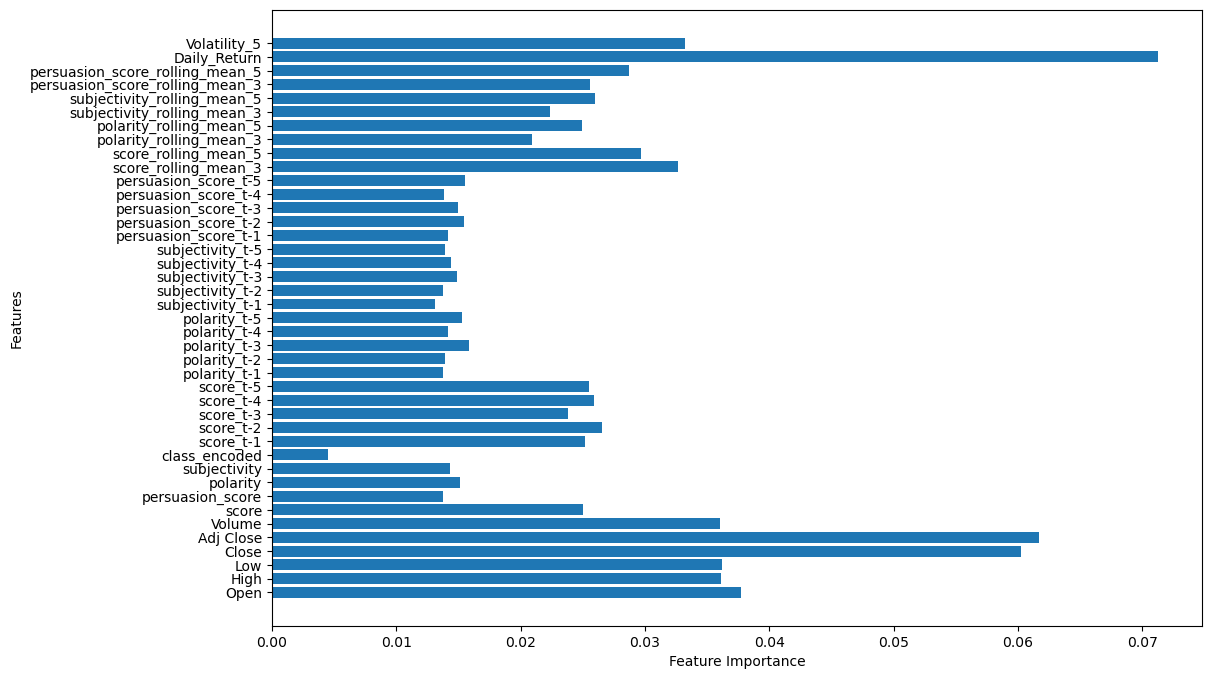

In [40]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", np.mean(scores))

Cross-validated Accuracy: 0.6083333333333334


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train NB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_nb = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1] 

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_nb)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("NB Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_nb))


NB Performance:
Accuracy: 0.4980
AUC-ROC: 0.5331
              precision    recall  f1-score   support

           0       0.55      0.26      0.36       268
           1       0.48      0.76      0.59       242

    accuracy                           0.50       510
   macro avg       0.51      0.51      0.47       510
weighted avg       0.52      0.50      0.47       510



In [ ]:
from sklearn.neural_network import MLPClassifier

# Train the MLP Classifier
mlp = MLPClassifier(activation="logistic", learning_rate="adaptive", learning_rate_init=0.001, max_iter=2000)
mlp.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_mlp = mlp.predict(X_test)
y_pred_prob = mlp.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print Performance Metrics
print("MLP Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_mlp))

MLP Classifier Performance:
Accuracy: 0.5667
AUC-ROC: 0.5770
              precision    recall  f1-score   support

           0       0.59      0.56      0.57       268
           1       0.54      0.58      0.56       242

    accuracy                           0.57       510
   macro avg       0.57      0.57      0.57       510
weighted avg       0.57      0.57      0.57       510



In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost Classifier
xgb = XGBClassifier( eval_metric="logloss", learning_rate=0.0001, n_estimators=2000, max_depth=20)
xgb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print Performance Metrics
print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Performance:
Accuracy: 0.5588
AUC-ROC: 0.5903
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       268
           1       0.54      0.49      0.51       242

    accuracy                           0.56       510
   macro avg       0.56      0.56      0.55       510
weighted avg       0.56      0.56      0.56       510



In [ ]:
y_train.index

Int64Index([1601, 1200, 1340, 2492, 2233, 1494, 2018,  240, 1849, 1381,
            ...
            1482,  330, 1238,  466, 2169, 1638, 1095, 1130, 1294,  860],
           dtype='int64', length=2040)

Epoch 1/50
51/51 [==============================] - 2s 12ms/step - loss: 0.6964 - accuracy: 0.4939 - val_loss: 0.6930 - val_accuracy: 0.5086
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5104 - val_loss: 0.6927 - val_accuracy: 0.5209
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5098 - val_loss: 0.6926 - val_accuracy: 0.5135
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4951 - val_loss: 0.6925 - val_accuracy: 0.5135
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5233 - val_loss: 0.6922 - val_accuracy: 0.5184
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5147 - val_loss: 0.6921 - val_accuracy: 0.5160
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4939 - val_loss: 0.6920 - val_accuracy: 0.5184
Epoch 8/50
51/51 [=

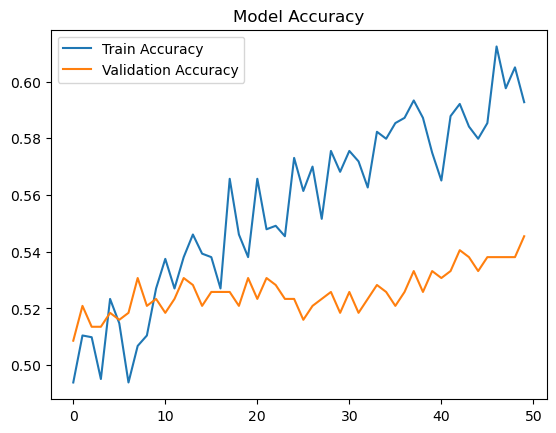

16/16 [==============================] - 0s 895us/step
LSTM Classifier Performance:
Accuracy: 0.4832
AUC-ROC: 0.4545

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       265
           1       0.45      0.43      0.44       240

    accuracy                           0.48       505
   macro avg       0.48      0.48      0.48       505
weighted avg       0.48      0.48      0.48       505


Confusion Matrix:
[[140 125]
 [136 104]]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam, Adagrad
import matplotlib.pyplot as plt

# Assuming X_train and y_train are pandas DataFrame/Series
X_train_val = X_train
y_train_val = y_train.to_numpy()

# Define the number of timesteps (lags)
timesteps = 5  # Use 5 lags as timesteps

# Prepare sequences for LSTM input
X_lstm = []
y_lstm = []
for i in range(timesteps, len(X_train_val)):
    X_lstm.append(X_train_val[i-timesteps:i, :])  # Select 5 previous rows (timesteps)
    y_lstm.append(y_train_val[i])  # Target value for the current timestep

# Convert lists to NumPy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.7),  # Dropout layer for regularization
    LSTM(25, activation='tanh', return_sequences=False),  # Second LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, validation_split=0.20, verbose=1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Prepare X_test and y_test for LSTM input
X_test_val = X_test
y_test_val = y_test.to_numpy()

X_test_lstm = []
y_test_lstm = []
for i in range(timesteps, len(X_test_val)):
    X_test_lstm.append(X_test_val[i-timesteps:i, :])
    y_test_lstm.append(y_test_val[i])

# Convert to NumPy arrays
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Make predictions
y_pred_prob = model.predict(X_test_lstm)  # Predicted probabilities
y_pred_lstm = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Flatten arrays for compatibility
y_test_lstm_flat = y_test_lstm.flatten()
y_pred_lstm_flat = y_pred_lstm.flatten()

# Calculate Metrics
accuracy = accuracy_score(y_test_lstm_flat, y_pred_lstm_flat)
auc_roc = roc_auc_score(y_test_lstm_flat, y_pred_prob)
classification_rep = classification_report(y_test_lstm_flat, y_pred_lstm_flat)
conf_matrix = confusion_matrix(y_test_lstm_flat, y_pred_lstm_flat)

# Print Metrics
print("LSTM Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Epoch 1/50
102/102 [==============================] - 2s 5ms/step - loss: 0.7187 - accuracy: 0.4865 - val_loss: 0.7009 - val_accuracy: 0.4889
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4926 - val_loss: 0.6998 - val_accuracy: 0.4914
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5252 - val_loss: 0.6990 - val_accuracy: 0.4889
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4969 - val_loss: 0.6982 - val_accuracy: 0.4889
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5018 - val_loss: 0.6977 - val_accuracy: 0.4988
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5086 - val_loss: 0.6972 - val_accuracy: 0.4939
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5086 - val_loss: 0.6971 - val_accuracy: 0.4963
Epoch 

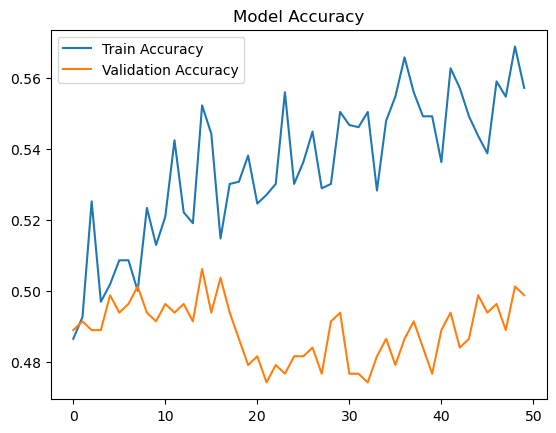

16/16 [==============================] - 0s 972us/step
GRU Classifier Performance:
Accuracy: 0.5129
AUC-ROC: 0.5059

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       265
           1       0.49      0.49      0.49       240

    accuracy                           0.51       505
   macro avg       0.51      0.51      0.51       505
weighted avg       0.51      0.51      0.51       505


Confusion Matrix:
[[141 124]
 [122 118]]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers.legacy import Adam, Adagrad
import matplotlib.pyplot as plt

# Assuming X_train and y_train are pandas DataFrame/Series
X_train_val = X_train
y_train_val = y_train.to_numpy()

# Define the number of timesteps (lags)
timesteps = 5  # Use 5 lags as timesteps

# Prepare sequences for LSTM input
X_lstm = []
y_lstm = []
for i in range(timesteps, len(X_train_val)):
    X_lstm.append(X_train_val[i-timesteps:i, :])  # Select 5 previous rows (timesteps)
    y_lstm.append(y_train_val[i])  # Target value for the current timestep

# Convert lists to NumPy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)


model = Sequential([
    GRU(50, activation='tanh', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.8),
    GRU(25, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=16, validation_split=0.20, verbose=1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Prepare X_test and y_test for LSTM input
X_test_val = X_test
y_test_val = y_test.to_numpy()

X_test_lstm = []
y_test_lstm = []
for i in range(timesteps, len(X_test_val)):
    X_test_lstm.append(X_test_val[i-timesteps:i, :])
    y_test_lstm.append(y_test_val[i])

# Convert to NumPy arrays
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Make predictions
y_pred_prob = model.predict(X_test_lstm)  # Predicted probabilities
y_pred_lstm = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Flatten arrays for compatibility
y_test_lstm_flat = y_test_lstm.flatten()
y_pred_lstm_flat = y_pred_lstm.flatten()

# Calculate Metrics
accuracy = accuracy_score(y_test_lstm_flat, y_pred_lstm_flat)
auc_roc = roc_auc_score(y_test_lstm_flat, y_pred_prob)
classification_rep = classification_report(y_test_lstm_flat, y_pred_lstm_flat)
conf_matrix = confusion_matrix(y_test_lstm_flat, y_pred_lstm_flat)

# Print Metrics
print("GRU Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Epoch 1/50
102/102 [==============================] - 3s 8ms/step - loss: 0.7046 - accuracy: 0.4631 - val_loss: 0.6931 - val_accuracy: 0.5160
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4791 - val_loss: 0.6926 - val_accuracy: 0.5332
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5049 - val_loss: 0.6924 - val_accuracy: 0.5455
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5074 - val_loss: 0.6921 - val_accuracy: 0.5405
Epoch 5/50
102/102 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5313 - val_loss: 0.6923 - val_accuracy: 0.5430
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5037 - val_loss: 0.6918 - val_accuracy: 0.5430
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5055 - val_loss: 0.6916 - val_accuracy: 0.5356
Epoch 

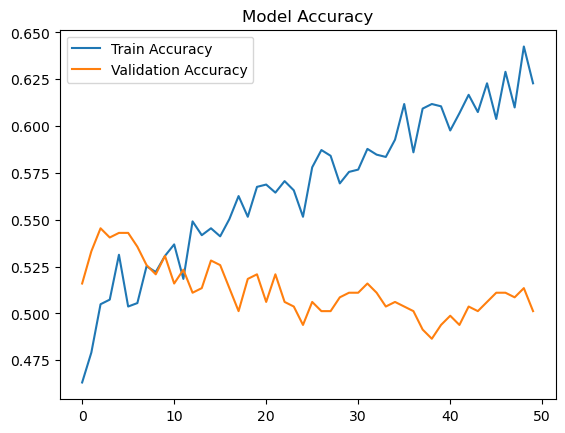

16/16 [==============================] - 1s 1ms/step
GRU Classifier Performance:
Accuracy: 0.5168
AUC-ROC: 0.5123

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       265
           1       0.49      0.51      0.50       240

    accuracy                           0.52       505
   macro avg       0.52      0.52      0.52       505
weighted avg       0.52      0.52      0.52       505


Confusion Matrix:
[[139 126]
 [118 122]]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Bidirectional
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers.legacy import Adam, Adagrad
import matplotlib.pyplot as plt

# Assuming X_train and y_train are pandas DataFrame/Series
X_train_val = X_train
y_train_val = y_train.to_numpy()

# Define the number of timesteps (lags)
timesteps = 5  # Use 5 lags as timesteps

# Prepare sequences for LSTM input
X_lstm = []
y_lstm = []
for i in range(timesteps, len(X_train_val)):
    X_lstm.append(X_train_val[i-timesteps:i, :])  # Select 5 previous rows (timesteps)
    y_lstm.append(y_train_val[i])  # Target value for the current timestep

# Convert lists to NumPy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)


model = Sequential([
    Bidirectional(LSTM(50, activation='tanh', return_sequences=True), input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.8),
    Bidirectional(LSTM(25, activation='tanh', return_sequences=False)),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=16, validation_split=0.20, verbose=1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Prepare X_test and y_test for LSTM input
X_test_val = X_test
y_test_val = y_test.to_numpy()

X_test_lstm = []
y_test_lstm = []
for i in range(timesteps, len(X_test_val)):
    X_test_lstm.append(X_test_val[i-timesteps:i, :])
    y_test_lstm.append(y_test_val[i])

# Convert to NumPy arrays
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Make predictions
y_pred_prob = model.predict(X_test_lstm)  # Predicted probabilities
y_pred_lstm = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Flatten arrays for compatibility
y_test_lstm_flat = y_test_lstm.flatten()
y_pred_lstm_flat = y_pred_lstm.flatten()

# Calculate Metrics
accuracy = accuracy_score(y_test_lstm_flat, y_pred_lstm_flat)
auc_roc = roc_auc_score(y_test_lstm_flat, y_pred_prob)
classification_rep = classification_report(y_test_lstm_flat, y_pred_lstm_flat)
conf_matrix = confusion_matrix(y_test_lstm_flat, y_pred_lstm_flat)

# Print Metrics
print("GRU Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


In [42]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,Price_Direction,class_encoded,score_t-1,score_t-2,score_t-3,score_t-4,score_t-5,polarity_t-1,polarity_t-2,polarity_t-3,polarity_t-4,polarity_t-5,subjectivity_t-1,subjectivity_t-2,subjectivity_t-3,subjectivity_t-4,subjectivity_t-5,persuasion_score_t-1,persuasion_score_t-2,persuasion_score_t-3,persuasion_score_t-4,persuasion_score_t-5,score_rolling_mean_3,score_rolling_mean_5,polarity_rolling_mean_3,polarity_rolling_mean_5,subjectivity_rolling_mean_3,subjectivity_rolling_mean_5,persuasion_score_rolling_mean_3,persuasion_score_rolling_mean_5,Daily_Return,Volatility_5
0,2017-11-09,1.010870,1.013270,0.996515,1.008180,1.008180,3.581880e+08,0.967353,0.00,0.000000,0.000000,neutral,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-10,1.006500,1.024230,0.995486,1.006010,1.006010,7.564460e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002152,0.000000
2,2017-11-11,1.005980,1.026210,0.995799,1.008990,1.008990,7.462280e+08,0.967353,0.00,0.000000,0.000000,neutral,1,1,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002962,0.000000
3,2017-11-12,1.006020,1.105910,0.967601,1.012470,1.012470,1.466060e+09,0.967353,0.00,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003449,0.000000
4,2017-11-13,1.004480,1.029290,0.975103,1.009350,1.009350,7.678840e+08,1.000000,0.70,0.000000,0.000000,neutral,0,1,0.967353,0.967353,0.967353,0.967353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.978235,0.973883,0.000000,0.000000,0.000000,0.000000,0.233333,0.140000,-0.003082,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,6.685550e+10,0.895219,0.50,0.066667,0.271429,neutral,1,1,0.820123,0.906884,0.934208,0.971383,0.995460,-0.031111,-0.070412,-0.023934,0.000000,0.000000,0.057778,0.263594,0.206846,0.000000,0.000000,0.40,0.60,0.605556,0.500000,0.700000,0.874076,0.905564,-0.011619,-0.011758,0.197600,0.159929,0.500000,0.521111,0.000561,0.000796
2546,2024-10-29,0.999333,1.000320,0.998754,0.999729,0.999729,8.758624e+10,0.913011,0.52,0.010000,0.401667,neutral,0,1,0.895219,0.820123,0.906884,0.934208,0.971383,0.066667,-0.031111,-0.070412,-0.023934,0.000000,0.271429,0.057778,0.263594,0.206846,0.000000,0.50,0.40,0.600000,0.605556,0.500000,0.876118,0.893889,0.015185,-0.009758,0.243624,0.240263,0.473333,0.525111,0.000424,0.000807
2547,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,6.914244e+10,0.748294,0.60,0.000000,0.000000,negative,0,0,0.913011,0.895219,0.820123,0.906884,0.934208,0.010000,0.066667,-0.031111,-0.070412,-0.023934,0.401667,0.271429,0.057778,0.263594,0.206846,0.52,0.50,0.400000,0.600000,0.605556,0.852175,0.856706,0.025556,-0.004971,0.224365,0.198893,0.540000,0.524000,-0.000097,0.000310
2548,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,6.744598e+10,0.989514,0.25,0.185000,0.521250,positiv

In [43]:
data.groupby('Price_Direction').count()

,Date,Open,High,Low,Close,Adj Close,Volume,score,persuasion_score,polarity,subjectivity,class,class_encoded,score_t-1,score_t-2,score_t-3,score_t-4,score_t-5,polarity_t-1,polarity_t-2,polarity_t-3,polarity_t-4,polarity_t-5,subjectivity_t-1,subjectivity_t-2,subjectivity_t-3,subjectivity_t-4,subjectivity_t-5,persuasion_score_t-1,persuasion_score_t-2,persuasion_score_t-3,persuasion_score_t-4,persuasion_score_t-5,score_rolling_mean_3,score_rolling_mean_5,polarity_rolling_mean_3,polarity_rolling_mean_5,subjectivity_rolling_mean_3,subjectivity_rolling_mean_5,persuasion_score_rolling_mean_3,persuasion_score_rolling_mean_5,Daily_Return,Volatility_5
Price_Direction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308
1,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
